#### Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.

Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
usp=share_link

Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.

Q2. Split the dataset into a training set (70%) and a test set (30%).

Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.

Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.

Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

Q7. Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.

Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [3]:
# read the data
df = pd.read_csv('dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

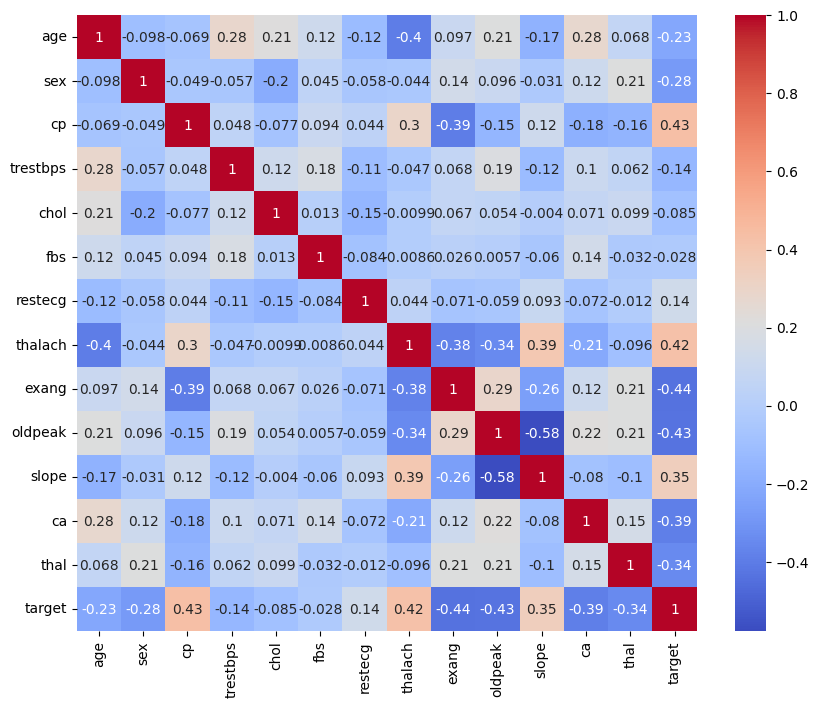

In [6]:
# heatmap corr
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show()

In [7]:
# segregate the independent and dependent feature
X = df.iloc[:,:-1]
y = df['target']

In [8]:
# train test and split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [9]:
# model training 
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [10]:
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
# performance metrics
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8241758241758241


In [13]:
# let's build model with hyperparameter tunning
parameters = {
    'max_depth':[3,5,10,None],
    'n_estimators':[100,200,300],
    'criterion':['gini','entropy']
}

In [14]:
classifier = RandomForestClassifier()

In [15]:
from sklearn.model_selection import RandomizedSearchCV

In [16]:
cv = RandomizedSearchCV(classifier,param_distributions=parameters,cv=5,scoring='accuracy',verbose=3)

In [17]:
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=10, n_estimators=100;, score=0.837 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=10, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, n_estimators=100;, score=0.857 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=10, n_estimators=100;, score=0.786 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=10, n_estimators=100;, score=0.833 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, n_estimators=300;, score=0.767 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=None, n_estimators=300;, score=0.837 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=None, n_estimators=300;, score=0.857 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=None, n_estimators=300;, score=0.762 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=None, n_estimators=300;, score=0.833 total time=   0.4s

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

In [18]:
cv.best_params_

{'n_estimators': 300, 'max_depth': 5, 'criterion': 'gini'}

In [24]:
cv.best_score_

0.8395348837209303